# Librerias 

In [1]:
#Librerias
import pandas as pd 
import pyreadstat
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ubicacion del la base de datos censo 2010 unida con tipologia de hogar
path_censo = 'Base_censo_2010_con_tipologia_hogar.csv'

In [3]:
# Ubicacion del la base de datos de tipologia de hogar
path_tarifa_provincia = 'tarifa_provincia.xlsx'

In [4]:
%%time
df = pd.read_csv(path_censo)

Wall time: 39.1 s


In [5]:
df_tarifa_provincia = pd.read_excel(path_tarifa_provincia)

In [6]:
df.head()

,I01,I02,I03,I04,I05,I06,I09,I10,URH,H00,...,P02,id,Numero de hijos,Numero de hijas,Parientes,No Parientes,Codigo,Nh,Tipology,Tipo de Hogares
0,1,1,50,1,1,1,1,1,1.0,1.0,...,1.0,1.015000e+16,0.0,3.0,0.0,0.0,123.0,3.0,2.0,Nuclear Biparental con hijos
1,1,1,50,1,1,1,2,1,1.0,1.0,...,1.0,1.015000e+16,1.0,0.0,0.0,0.0,13.0,1.0,5.0,Nuclear Monoparental con jefatura femenina
2,1,1,50,1,1,1,3,1,1.0,1.0,...,1.0,1.015000e+16,3.0,2.0,2.0,0.0,135.0,5.0,9.0,Extenso Monoparental con jefatura femenina
3,1,1,50,1,1,1,4,1,1.0,1.0,...,1.0,1.015000e+16,2.0,3.0,1.0,1.0,12358.0,5.0,16.0,Nuclear Extenso Compuesto
4,1,1,50,1,1,1,5,1,1.0,1.0,...,1.0,1.015000e+16,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Unipersonal


In [7]:
df_tarifa_provincia.head()

,Código,Nombre de la Provincia,PRECIO MEDIO 2010 ($/kWh),PRECIO MEDIO 2014 ($/kWh),PRECIO MEDIO 2017 ($/kWh)
0,1,AZUAY,0.0922,0.0943,0.1034
1,2,BOLIVAR,0.0922,0.0982,0.0978
2,3,CAÑAR,0.0922,0.0883,0.0991
3,4,CARCHI,0.0922,0.0977,0.1038
4,5,COTOPAXI,0.0922,0.0891,0.1000


In [8]:
df_tarifa_provincia = df_tarifa_provincia.rename(columns={'Código':'I01' })

In [9]:
df['I01'].dtypes

dtype('int64')

In [10]:
df_tarifa_provincia['I01'].dtypes

dtype('int64')

# Merge con data tarifa por año

In [11]:
%%time
df_result_final = pd.merge(df, df_tarifa_provincia, on= 'I01', how='outer' )

Wall time: 11 s


In [12]:
df_result_final

,I01,I02,I03,I04,I05,I06,I09,I10,URH,H00,...,Parientes,No Parientes,Codigo,Nh,Tipology,Tipo de Hogares,Nombre de la Provincia,PRECIO MEDIO 2010 ($/kWh),PRECIO MEDIO 2014 ($/kWh),PRECIO MEDIO 2017 ($/kWh)
0,1,1,50,1,1,1,1,1,1.0,1.0,...,0.0,0.0,123.0,3.0,2.0,Nuclear Biparental con hijos,AZUAY,0.0922,0.0943,0.1034
1,1,1,50,1,1,1,2,1,1.0,1.0,...,0.0,0.0,13.0,1.0,5.0,Nuclear Monoparental con jefatura femenina,AZUAY,0.0922,0.0943,0.1034
2,1,1,50,1,1,1,3,1,1.0,1.0,...,2.0,0.0,135.0,5.0,9.0,Extenso Monoparental con jefatura femenina,AZUAY,0.0922,0.0943,0.1034
3,1,1,50,1,1,1,4,1,1.0,1.0,...,1.0,1.0,12358.0,5.0,16.0,Nuclear Extenso Compuesto,AZUAY,0.0922,0.0943,0.1034
4,1,1,50,1,1,1,5,1,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,Unipersonal,AZUAY,0.0922,0.0943,0.1034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3815522,90,4,51,999,22,3,2,1,2.0,1.0,...,0.0,0.0,1.0,0.0,1.0,Unipersonal,ZONA NO DELIMITADA,0.0922,0.0952,0.1004
3815523,90,4,51,999,22,3,13,1,2.0,1.0,...,0.0,0.0,123.0,2.0,2.0,Nuclear Biparental con hijos,ZONA NO DELIMITADA,0.0922,0.0952,0.1004
3815524,90,4,51,999,22,4,1,1,2.0,1.0,...,0.0,0.0,123.0,3.0,2.0,Nuclear Biparental con hijos,ZONA NO DELIMITADA,0.0922,0.0952,0.1004
3815525,90,4,51,999,22,4,2,1,2.0,1.0,...,1.0,0.0,1237.0,4.0,6.0,Extenso Biparental con hijos,ZONA NO DELIMITADA,0.0922,0.0952,0.1004


In [13]:
del  df_result_final['PRECIO MEDIO 2014 ($/kWh)']
del  df_result_final['PRECIO MEDIO 2017 ($/kWh)']

# Data con valores de pago 9999

In [14]:
df_result_final

,I01,I02,I03,I04,I05,I06,I09,I10,URH,H00,...,Numero de hijos,Numero de hijas,Parientes,No Parientes,Codigo,Nh,Tipology,Tipo de Hogares,Nombre de la Provincia,PRECIO MEDIO 2010 ($/kWh)
0,1,1,50,1,1,1,1,1,1.0,1.0,...,0.0,3.0,0.0,0.0,123.0,3.0,2.0,Nuclear Biparental con hijos,AZUAY,0.0922
1,1,1,50,1,1,1,2,1,1.0,1.0,...,1.0,0.0,0.0,0.0,13.0,1.0,5.0,Nuclear Monoparental con jefatura femenina,AZUAY,0.0922
2,1,1,50,1,1,1,3,1,1.0,1.0,...,3.0,2.0,2.0,0.0,135.0,5.0,9.0,Extenso Monoparental con jefatura femenina,AZUAY,0.0922
3,1,1,50,1,1,1,4,1,1.0,1.0,...,2.0,3.0,1.0,1.0,12358.0,5.0,16.0,Nuclear Extenso Compuesto,AZUAY,0.0922
4,1,1,50,1,1,1,5,1,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Unipersonal,AZUAY,0.0922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3815522,90,4,51,999,22,3,2,1,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Unipersonal,ZONA NO DELIMITADA,0.0922
3815523,90,4,51,999,22,3,13,1,2.0,1.0,...,0.0,2.0,0.0,0.0,123.0,2.0,2.0,Nuclear Biparental con hijos,ZONA NO DELIMITADA,0.0922
3815524,90,4,51,999,22,4,1,1,2.0,1.0,...,1.0,2.0,0.0,0.0,123.0,3.0,2.0,Nuclear Biparental con hijos,ZONA NO DELIMITADA,0.0922
3815525,90,4,51,999,22,4,2,1,2.0,1.0,...,1.0,3.0,1.0,0.0,1237.0,4.0,6.0,Extenso Biparental con hijos,ZONA NO DELIMITADA,0.0922


In [15]:
df_result_9999= df_result_final[(df_result_final['H12']==9999)]

In [16]:
df_result_9999

,I01,I02,I03,I04,I05,I06,I09,I10,URH,H00,...,Numero de hijos,Numero de hijas,Parientes,No Parientes,Codigo,Nh,Tipology,Tipo de Hogares,Nombre de la Provincia,PRECIO MEDIO 2010 ($/kWh)
17,1,1,50,1,1,1,18,5,1.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Unipersonal,AZUAY,0.0922
29,1,1,50,1,1,1,31,1,1.0,1.0,...,2.0,0.0,1.0,0.0,137.0,2.0,9.0,Extenso Monoparental con jefatura femenina,AZUAY,0.0922
30,1,1,50,1,1,1,32,1,1.0,1.0,...,0.0,1.0,0.0,0.0,13.0,1.0,5.0,Nuclear Monoparental con jefatura femenina,AZUAY,0.0922
31,1,1,50,1,1,1,33,1,1.0,1.0,...,0.0,3.0,1.0,0.0,137.0,3.0,9.0,Extenso Monoparental con jefatura femenina,AZUAY,0.0922
32,1,1,50,1,1,1,34,1,1.0,1.0,...,2.0,2.0,0.0,0.0,123.0,4.0,2.0,Nuclear Biparental con hijos,AZUAY,0.0922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3815151,90,4,51,999,13,3,7,1,2.0,1.0,...,1.0,0.0,1.0,0.0,1237.0,1.0,6.0,Extenso Biparental con hijos,ZONA NO DELIMITADA,0.0922
3815189,90,4,51,999,15,3,12,1,2.0,1.0,...,1.0,0.0,2.0,0.0,1237.0,1.0,6.0,Extenso Biparental con hijos,ZONA NO DELIMITADA,0.0922
3815356,90,4,51,999,20,2,1,1,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Unipersonal,ZONA NO DELIMITADA,0.0922
3815365,90,4,51,999,20,2,10,1,2.0,1.0,...,3.0,5.0,0.0,1.0,1238.0,8.0,10.0,Compuesto Biparental con hijos,ZONA NO DELIMITADA,0.0922


In [17]:
df_9999= df_result_9999['Tipo de Hogares'].value_counts()

In [18]:
df_9999= pd.DataFrame(df_9999)

In [19]:
df_9999=df_9999['Tipo de Hogares']/df_9999['Tipo de Hogares'].sum()*100

In [20]:
df_9999= pd.DataFrame(df_9999)

In [21]:
df_9999['Tipo de Hogares'].round(2)

Nuclear Biparental con hijos                      29.74
Unipersonal                                       21.27
Nuclear Monoparental con jefatura femenina        10.19
Hogar no nuclear con parientes                     7.42
Extenso Biparental con hijos                       7.20
Nuclear Biparental sin hijos                       6.62
Extenso Monoparental con jefatura femenina         5.06
Extenso Monoparental con jefatura masculina        3.18
Nuclear Extenso Compuesto                          2.70
Extenso Biparental sin hijos                       2.05
Nuclear Monoparental con jefatura masculina        1.93
Hogar no nuclear con no parientes                  1.09
Compuesto Biparental con hijos                     0.61
Compuesto  Monoparental con jefatura  femenina     0.39
Compuesto Biparental sin hijos                     0.31
Compuesto Monoparental con jefatura masculina      0.23
Name: Tipo de Hogares, dtype: float64

<AxesSubplot:>

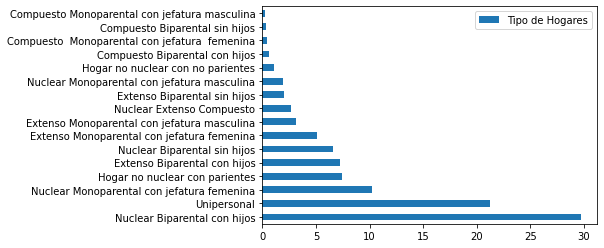

In [22]:
df_9999.plot(kind = 'barh')

In [23]:
# Revisamos algun tipo de patron en la no declaracion del pago

In [24]:
df_result_final= df_result_final[(df_result_final['H12']!=9999)]

In [25]:
df_result_final

,I01,I02,I03,I04,I05,I06,I09,I10,URH,H00,...,Numero de hijos,Numero de hijas,Parientes,No Parientes,Codigo,Nh,Tipology,Tipo de Hogares,Nombre de la Provincia,PRECIO MEDIO 2010 ($/kWh)
0,1,1,50,1,1,1,1,1,1.0,1.0,...,0.0,3.0,0.0,0.0,123.0,3.0,2.0,Nuclear Biparental con hijos,AZUAY,0.0922
1,1,1,50,1,1,1,2,1,1.0,1.0,...,1.0,0.0,0.0,0.0,13.0,1.0,5.0,Nuclear Monoparental con jefatura femenina,AZUAY,0.0922
2,1,1,50,1,1,1,3,1,1.0,1.0,...,3.0,2.0,2.0,0.0,135.0,5.0,9.0,Extenso Monoparental con jefatura femenina,AZUAY,0.0922
3,1,1,50,1,1,1,4,1,1.0,1.0,...,2.0,3.0,1.0,1.0,12358.0,5.0,16.0,Nuclear Extenso Compuesto,AZUAY,0.0922
4,1,1,50,1,1,1,5,1,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Unipersonal,AZUAY,0.0922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3815522,90,4,51,999,22,3,2,1,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Unipersonal,ZONA NO DELIMITADA,0.0922
3815523,90,4,51,999,22,3,13,1,2.0,1.0,...,0.0,2.0,0.0,0.0,123.0,2.0,2.0,Nuclear Biparental con hijos,ZONA NO DELIMITADA,0.0922
3815524,90,4,51,999,22,4,1,1,2.0,1.0,...,1.0,2.0,0.0,0.0,123.0,3.0,2.0,Nuclear Biparental con hijos,ZONA NO DELIMITADA,0.0922
3815525,90,4,51,999,22,4,2,1,2.0,1.0,...,1.0,3.0,1.0,0.0,1237.0,4.0,6.0,Extenso Biparental con hijos,ZONA NO DELIMITADA,0.0922


In [26]:
df_result_final['H12'].describe().round()

count    2987232.0
mean          17.0
std           17.0
min            1.0
25%            6.0
50%           11.0
75%           22.0
max          887.0
Name: H12, dtype: float64

In [27]:
df_result_final['Tipo de Hogares'].isna().sum()

4979

# Consumo en kilowatt-hora (kWh)

In [28]:
df_result_final.columns

Index(['I01', 'I02', 'I03', 'I04', 'I05', 'I06', 'I09', 'I10', 'URH', 'H00',
       'H01', 'H01N', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09',
       'H10', 'H11', 'H12', 'H12NP', 'H13A', 'H13B', 'H14A', 'H14B', 'H15',
       'M1', 'M2A', 'M2B', 'TP1', 'TH1', 'TM1', 'id_man', 'id_viv', 'id_hog',
       'id_provin', 'id_can', 'id_parr', 'P01', 'P02', 'id', 'Numero de hijos',
       'Numero de hijas', 'Parientes', 'No Parientes', 'Codigo', 'Nh',
       'Tipology', 'Tipo de Hogares', 'Nombre de la Provincia',
       'PRECIO MEDIO 2010 ($/kWh)'],
      dtype='object')

In [29]:
df_result_final['Consumo_kwh'] = df_result_final['H12']/df_result_final['PRECIO MEDIO 2010 ($/kWh)']

C:\Users\Dell\AppData\Local\Temp/ipykernel_7244/3671794888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_final['Consumo_kwh'] = df_result_final['H12']/df_result_final['PRECIO MEDIO 2010 ($/kWh)']


In [30]:
df_result_final.head()

,I01,I02,I03,I04,I05,I06,I09,I10,URH,H00,...,Numero de hijas,Parientes,No Parientes,Codigo,Nh,Tipology,Tipo de Hogares,Nombre de la Provincia,PRECIO MEDIO 2010 ($/kWh),Consumo_kwh
0,1,1,50,1,1,1,1,1,1.0,1.0,...,3.0,0.0,0.0,123.0,3.0,2.0,Nuclear Biparental con hijos,AZUAY,0.0922,162.689805
1,1,1,50,1,1,1,2,1,1.0,1.0,...,0.0,0.0,0.0,13.0,1.0,5.0,Nuclear Monoparental con jefatura femenina,AZUAY,0.0922,195.227766
2,1,1,50,1,1,1,3,1,1.0,1.0,...,2.0,2.0,0.0,135.0,5.0,9.0,Extenso Monoparental con jefatura femenina,AZUAY,0.0922,206.073753
3,1,1,50,1,1,1,4,1,1.0,1.0,...,3.0,1.0,1.0,12358.0,5.0,16.0,Nuclear Extenso Compuesto,AZUAY,0.0922,455.531453
4,1,1,50,1,1,1,5,1,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,Unipersonal,AZUAY,0.0922,130.151844


In [41]:
df_result_final = df_result_final[df_result_final['Consumo_kwh']<500]

<AxesSubplot:>

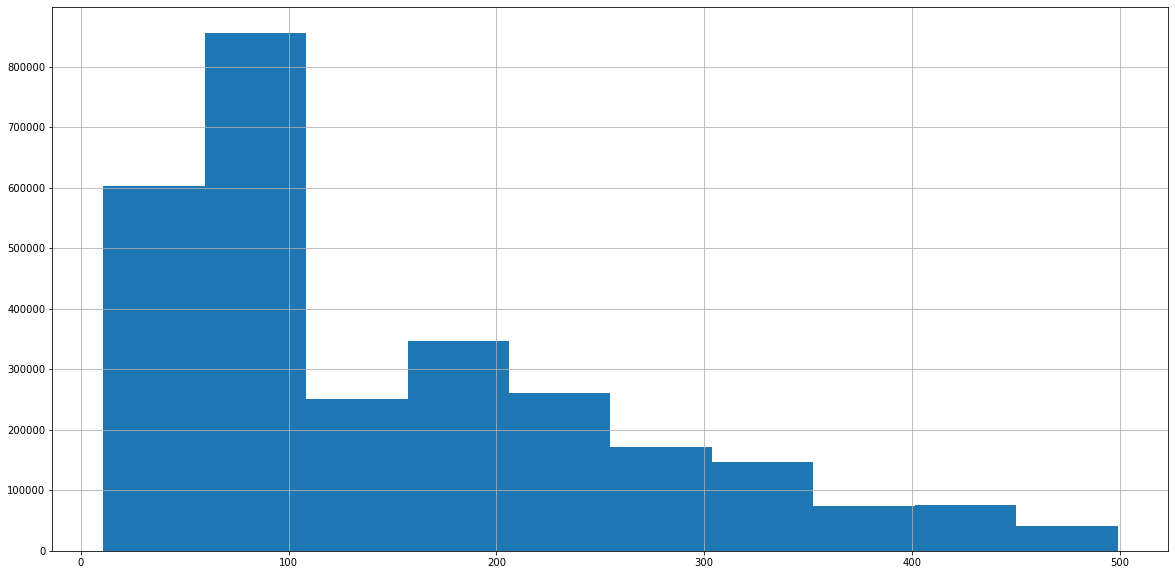

In [44]:
df_result_final['Consumo_kwh'].hist(bins=10, figsize=(20,10))

In [31]:
df_result_final['Tipo de Hogares'].unique()

array(['Nuclear Biparental con hijos',
       'Nuclear Monoparental con jefatura femenina',
       'Extenso Monoparental con jefatura femenina',
       'Nuclear Extenso Compuesto', 'Unipersonal',
       'Extenso Monoparental con jefatura masculina',
       'Extenso Biparental con hijos', 'Hogar no nuclear con parientes',
       'Compuesto  Monoparental con jefatura  femenina',
       'Nuclear Biparental sin hijos', 'Extenso Biparental sin hijos',
       'Compuesto Biparental con hijos',
       'Hogar no nuclear con no parientes',
       'Compuesto Monoparental con jefatura masculina',
       'Nuclear Monoparental con jefatura masculina',
       'Compuesto Biparental sin hijos', nan], dtype=object)

# Filtro hogares NaN

In [32]:
filtered_df = df_result_final[df_result_final['Tipo de Hogares'].isnull()]

In [33]:
filtered_df

,I01,I02,I03,I04,I05,I06,I09,I10,URH,H00,...,Numero de hijas,Parientes,No Parientes,Codigo,Nh,Tipology,Tipo de Hogares,Nombre de la Provincia,PRECIO MEDIO 2010 ($/kWh),Consumo_kwh
1940,1,1,50,2,6,2,11,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AZUAY,0.0922,NaN
5489,1,1,50,5,9,1,72,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AZUAY,0.0922,NaN
5490,1,1,50,5,9,1,73,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AZUAY,0.0922,NaN
7191,1,1,50,7,5,3,70,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AZUAY,0.0922,NaN
7403,1,1,50,7,7,2,43,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AZUAY,0.0922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3807996,90,1,51,1,4,3,4,1,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZONA NO DELIMITADA,0.0922,NaN
3808737,90,1,51,999,2,3,7,1,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZONA NO DELIMITADA,0.0922,NaN
3809218,90,3,51,921,3,4,8,1,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZONA NO DELIMITADA,0.0922,NaN
3810086,90,3,51,934,2,18,14,1,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZONA NO DELIMITADA,0.0922,NaN


In [34]:
list(filtered_df['id_hog'].unique())

[10150002006020111,
 10150005009010721,
 10150005009010731,
 10150007005030701,
 10150007007020431,
 10150008011010061,
 10150008011040341,
 10150009006040031,
 10150011004020591,
 10150018002021011,
 10150018004020111,
 10150019006020261,
 10150019006020631,
 10150020002020141,
 10150020004010081,
 10150021002020181,
 10150021004050111,
 10150021004050121,
 10150021006080241,
 10150021006080311,
 10150021006080321,
 10150022011130671,
 10150025007020111,
 10150026008020011,
 10150027007011811,
 10150028006011041,
 10150028009010591,
 10150028011010981,
 10150029001020181,
 10150029002020011,
 10150029008010101,
 10150030001030161,
 10150030001050131,
 10150030002010121,
 10150030002020101,
 10150030002080181,
 10150030003060111,
 10150030006010351,
 10150030007020111,
 10150030007040111,
 10150031001020031,
 10150031002020591,
 10150031004010091,
 10150031004020371,
 10150031005010341,
 10150031005010531,
 10150031005030041,
 10150031005030331,
 10150031006010131,
 10150031008011111,


In [35]:
#Nota: Estos Id de hogar no pueden ser clasificados porque no cumplen la definicion de hogar

# Cuadros y análisis

In [36]:
df_conteo_consumo = df_result_final.groupby(['Tipo de Hogares']).describe()
df_varianza = df_result_final.groupby(['Tipo de Hogares']).var()
df_consumo_mensua_electricidad = df_result_final.groupby(['Tipo de Hogares']).mean()
df_consumo_mensua_electricidad_kwh = df_result_final.groupby(['Tipo de Hogares']).mean()

In [37]:
df_consumo_mensua_electricidad['H12']

Tipo de Hogares
Compuesto  Monoparental con jefatura  femenina    19.905205
Compuesto Biparental con hijos                    23.415715
Compuesto Biparental sin hijos                    19.822410
Compuesto Monoparental con jefatura masculina     20.210585
Extenso Biparental con hijos                      20.087178
Extenso Biparental sin hijos                      17.101728
Extenso Monoparental con jefatura femenina        18.963013
Extenso Monoparental con jefatura masculina       18.341677
Hogar no nuclear con no parientes                 18.009911
Hogar no nuclear con parientes                    15.918707
Nuclear Biparental con hijos                      17.199624
Nuclear Biparental sin hijos                      14.870562
Nuclear Extenso Compuesto                         22.197356
Nuclear Monoparental con jefatura femenina        15.457813
Nuclear Monoparental con jefatura masculina       15.743102
Unipersonal                                       11.917119
Name: H12, dtype: float6

In [38]:
df_consumo_mensua_electricidad_kwh['Consumo_kwh']

Tipo de Hogares
Compuesto  Monoparental con jefatura  femenina    215.891596
Compuesto Biparental con hijos                    253.966542
Compuesto Biparental sin hijos                    214.993600
Compuesto Monoparental con jefatura masculina     219.203738
Extenso Biparental con hijos                      217.865272
Extenso Biparental sin hijos                      185.485117
Extenso Monoparental con jefatura femenina        205.672587
Extenso Monoparental con jefatura masculina       198.933589
Hogar no nuclear con no parientes                 195.335257
Hogar no nuclear con parientes                    172.654085
Nuclear Biparental con hijos                      186.546898
Nuclear Biparental sin hijos                      161.285917
Nuclear Extenso Compuesto                         240.752235
Nuclear Monoparental con jefatura femenina        167.655234
Nuclear Monoparental con jefatura masculina       170.749480
Unipersonal                                       129.252920
Name: Co

In [39]:
df_estadistico = df_conteo_consumo['H12']

In [40]:
df_estadistico['varianza'] = df_varianza['H12']

C:\Users\Dell\AppData\Local\Temp/ipykernel_14420/1015382712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estadistico['varianza'] = df_varianza['H12']


In [41]:
df_estadistico['Consumo mensual medio de electricidad $'] = df_consumo_mensua_electricidad ['H12']

C:\Users\Dell\AppData\Local\Temp/ipykernel_14420/4272416841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estadistico['Consumo mensual medio de electricidad $'] = df_consumo_mensua_electricidad ['H12']


In [42]:
df_estadistico['Consumo mensual medio kwh'] = df_consumo_mensua_electricidad_kwh['Consumo_kwh']

C:\Users\Dell\AppData\Local\Temp/ipykernel_14420/2749637502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estadistico['Consumo mensual medio kwh'] = df_consumo_mensua_electricidad_kwh['Consumo_kwh']


# Cuadro 1

In [43]:
df_estadistico.sort_values( by=['mean'] , axis= 0, ascending= False).round(2)

,count,mean,std,min,25%,50%,75%,max,varianza,Consumo mensual medio de electricidad $,Consumo mensual medio kwh
Tipo de Hogares,,,,,,,,,,,
Compuesto Biparental con hijos,25224.0,23.42,25.59,1.0,8.0,16.0,29.0,360.0,654.84,23.42,253.97
Nuclear Extenso Compuesto,59684.0,22.20,22.41,1.0,8.0,16.0,28.0,320.0,502.27,22.20,240.75
Compuesto Monoparental con jefatura masculina,3609.0,20.21,22.06,1.0,7.0,14.0,25.0,300.0,486.73,20.21,219.20
Extenso Biparental con hijos,376379.0,20.09,18.61,1.0,7.0,15.0,26.0,380.0,346.29,20.09,217.87
Compuesto Monoparental con jefatura femenina,10528.0,19.91,19.59,1.0,7.0,15.0,25.0,300.0,383.84,19.91,215.89
Compuesto Biparental sin hijos,9353.0,19.82,21.92,1.0,7.0,12.0,25.0,300.0,480.69,19.82,214.99
Extenso Monoparental con jefatura femenina,208449.0,18.96,17.21,1.0,7.0,15.0,25.0,361.0,296.34,18.96,205.67
Extenso Monoparental con jefatura masculina,85016.0,18.34,17.63,1.0,7.0,12.0,24.0,300.0,310.84,18.34,198.93
Hogar no nuclear con no parientes,15337.0,18.01,19.94,1.0,6.0,11.0,22.0,390.0,397.76,18.01,195.34


In [44]:
extract = ['Tipology','H12','Consumo_kwh']

In [45]:
df_hist= df_result_final[extract]

C:\Users\Dell\AppData\Local\Temp/ipykernel_14420/3481044470.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels('Tipo de Hogares', rotation=45, ha='right')


<AxesSubplot:xlabel='Tipology', ylabel='Consumo_kwh'>

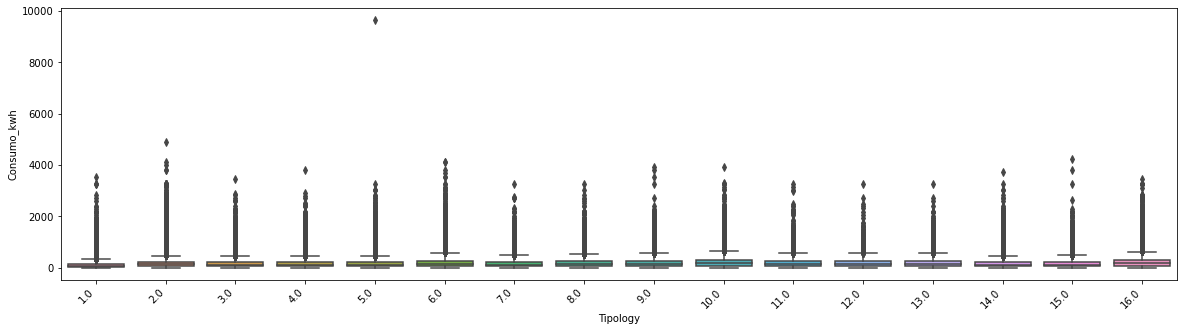

In [46]:
fig, ax = plt.subplots(figsize=(20,5))
ax.set_xticklabels('Tipo de Hogares', rotation=45, ha='right')
sns.boxplot( ax=ax, x=df_result_final['Tipology'], y=df_result_final['Consumo_kwh'] )

In [47]:
#La regla de Sturges ha sido descartada por datos atipicos en el marco de datos

In [48]:
df_result_final.groupby(['Tipo de Hogares'])['H12'].count()

Tipo de Hogares
Compuesto  Monoparental con jefatura  femenina      10528
Compuesto Biparental con hijos                      25224
Compuesto Biparental sin hijos                       9353
Compuesto Monoparental con jefatura masculina        3609
Extenso Biparental con hijos                       376379
Extenso Biparental sin hijos                        72694
Extenso Monoparental con jefatura femenina         208449
Extenso Monoparental con jefatura masculina         85016
Hogar no nuclear con no parientes                   15337
Hogar no nuclear con parientes                     143505
Nuclear Biparental con hijos                      1084028
Nuclear Biparental sin hijos                       218714
Nuclear Extenso Compuesto                           59684
Nuclear Monoparental con jefatura femenina         314821
Nuclear Monoparental con jefatura masculina         57155
Unipersonal                                        302736
Name: H12, dtype: int64

# Histograma por tipologia y consumo eléctrico

In [49]:
extract = ['Tipology','H12','Consumo_kwh']

In [50]:
df_hist= df_result_final[extract]

In [51]:
df_hist.describe().round(2)

,Tipology,H12,Consumo_kwh
count,3713332.00,2987232.00,2987232.00
mean,4.58,16.92,183.47
std,3.76,16.90,183.29
min,1.00,1.00,10.85
25%,2.00,6.00,65.08
50%,3.00,11.00,119.31
75%,6.00,22.00,238.61
max,16.00,887.00,9620.39


In [52]:
df_hist['H12'].value_counts()

5.0      240354
6.0      218171
7.0      205156
8.0      184014
10.0     171262
          ...  
237.0         1
254.0         1
262.0         1
251.0         1
203.0         1
Name: H12, Length: 271, dtype: int64

In [53]:
df_hist= df_hist[(df_hist['H12']<9999)]

In [54]:
df_hist.describe().round(2)

,Tipology,H12,Consumo_kwh
count,2987232.00,2987232.00,2987232.00
mean,4.68,16.92,183.47
std,3.76,16.90,183.29
min,1.00,1.00,10.85
25%,2.00,6.00,65.08
50%,3.00,11.00,119.31
75%,6.00,22.00,238.61
max,16.00,887.00,9620.39


array([[<AxesSubplot:title={'center':'1.0'}>,
        <AxesSubplot:title={'center':'2.0'}>,
        <AxesSubplot:title={'center':'3.0'}>,
        <AxesSubplot:title={'center':'4.0'}>],
       [<AxesSubplot:title={'center':'5.0'}>,
        <AxesSubplot:title={'center':'6.0'}>,
        <AxesSubplot:title={'center':'7.0'}>,
        <AxesSubplot:title={'center':'8.0'}>],
       [<AxesSubplot:title={'center':'9.0'}>,
        <AxesSubplot:title={'center':'10.0'}>,
        <AxesSubplot:title={'center':'11.0'}>,
        <AxesSubplot:title={'center':'12.0'}>],
       [<AxesSubplot:title={'center':'13.0'}>,
        <AxesSubplot:title={'center':'14.0'}>,
        <AxesSubplot:title={'center':'15.0'}>,
        <AxesSubplot:title={'center':'16.0'}>]], dtype=object)

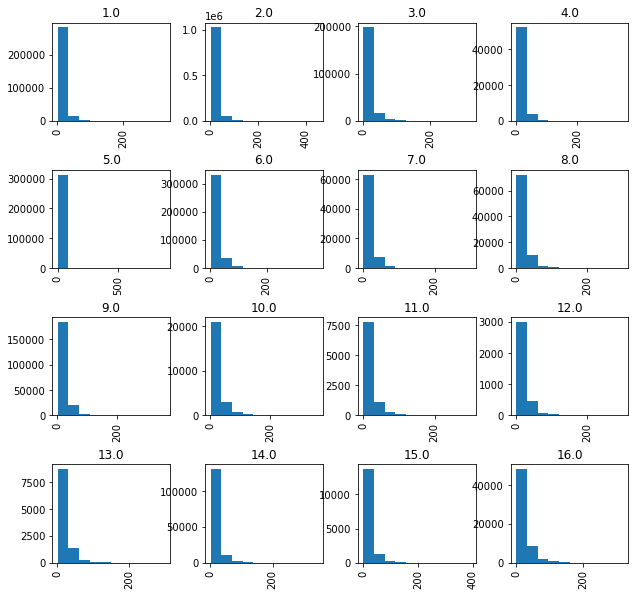

In [55]:
df_hist['H12'].hist(by=df_hist['Tipology'], figsize = (10,10), bins=10)

In [56]:
bins_groups = pd.cut(df_hist['H12'], bins=10)
bins_groups

0          (0.114, 89.6]
1          (0.114, 89.6]
2          (0.114, 89.6]
3          (0.114, 89.6]
4          (0.114, 89.6]
               ...      
3815518    (0.114, 89.6]
3815523    (0.114, 89.6]
3815524    (0.114, 89.6]
3815525    (0.114, 89.6]
3815526    (0.114, 89.6]
Name: H12, Length: 2987232, dtype: category
Categories (10, interval[float64, right]): [(0.114, 89.6] < (89.6, 178.2] < (178.2, 266.8] < (266.8, 355.4] ... (532.6, 621.2] < (621.2, 709.8] < (709.8, 798.4] < (798.4, 887.0]]

In [57]:
df_hist2 = df_hist.groupby(['Tipology',bins_groups]).size()
df_hist2

Tipology  H12           
1.0       (0.114, 89.6]     301412
          (89.6, 178.2]       1291
          (178.2, 266.8]        29
          (266.8, 355.4]         4
          (355.4, 444.0]         0
                             ...  
16.0      (444.0, 532.6]         0
          (532.6, 621.2]         0
          (621.2, 709.8]         0
          (709.8, 798.4]         0
          (798.4, 887.0]         0
Length: 160, dtype: int64

# Cuadro 2

In [58]:
df_hist2=df_hist2.reset_index(name='Cuenta')
df_hist2.head(50)

,Tipology,H12,Cuenta
0,1.0,"(0.114, 89.6]",301412
1,1.0,"(89.6, 178.2]",1291
2,1.0,"(178.2, 266.8]",29
3,1.0,"(266.8, 355.4]",4
4,1.0,"(355.4, 444.0]",0
5,1.0,"(444.0, 532.6]",0
6,1.0,"(532.6, 621.2]",0
7,1.0,"(621.2, 709.8]",0
8,1.0,"(709.8, 798.4]",0
9,1.0,"(798.4, 887.0]",0


# Visualización demográfica

In [59]:
df_result_final.head(2)

,I01,I02,I03,I04,I05,I06,I09,I10,URH,H00,...,Numero de hijas,Parientes,No Parientes,Codigo,Nh,Tipology,Tipo de Hogares,Nombre de la Provincia,PRECIO MEDIO 2010 ($/kWh),Consumo_kwh
0,1,1,50,1,1,1,1,1,1.0,1.0,...,3.0,0.0,0.0,123.0,3.0,2.0,Nuclear Biparental con hijos,AZUAY,0.0922,162.689805
1,1,1,50,1,1,1,2,1,1.0,1.0,...,0.0,0.0,0.0,13.0,1.0,5.0,Nuclear Monoparental con jefatura femenina,AZUAY,0.0922,195.227766


In [60]:
df_result_final.columns

Index(['I01', 'I02', 'I03', 'I04', 'I05', 'I06', 'I09', 'I10', 'URH', 'H00',
       'H01', 'H01N', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09',
       'H10', 'H11', 'H12', 'H12NP', 'H13A', 'H13B', 'H14A', 'H14B', 'H15',
       'M1', 'M2A', 'M2B', 'TP1', 'TH1', 'TM1', 'id_man', 'id_viv', 'id_hog',
       'id_provin', 'id_can', 'id_parr', 'P01', 'P02', 'id', 'Numero de hijos',
       'Numero de hijas', 'Parientes', 'No Parientes', 'Codigo', 'Nh',
       'Tipology', 'Tipo de Hogares', 'Nombre de la Provincia',
       'PRECIO MEDIO 2010 ($/kWh)', 'Consumo_kwh'],
      dtype='object')

In [61]:
df_result_final

,I01,I02,I03,I04,I05,I06,I09,I10,URH,H00,...,Numero de hijas,Parientes,No Parientes,Codigo,Nh,Tipology,Tipo de Hogares,Nombre de la Provincia,PRECIO MEDIO 2010 ($/kWh),Consumo_kwh
0,1,1,50,1,1,1,1,1,1.0,1.0,...,3.0,0.0,0.0,123.0,3.0,2.0,Nuclear Biparental con hijos,AZUAY,0.0922,162.689805
1,1,1,50,1,1,1,2,1,1.0,1.0,...,0.0,0.0,0.0,13.0,1.0,5.0,Nuclear Monoparental con jefatura femenina,AZUAY,0.0922,195.227766
2,1,1,50,1,1,1,3,1,1.0,1.0,...,2.0,2.0,0.0,135.0,5.0,9.0,Extenso Monoparental con jefatura femenina,AZUAY,0.0922,206.073753
3,1,1,50,1,1,1,4,1,1.0,1.0,...,3.0,1.0,1.0,12358.0,5.0,16.0,Nuclear Extenso Compuesto,AZUAY,0.0922,455.531453
4,1,1,50,1,1,1,5,1,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,Unipersonal,AZUAY,0.0922,130.151844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3815522,90,4,51,999,22,3,2,1,2.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,Unipersonal,ZONA NO DELIMITADA,0.0922,NaN
3815523,90,4,51,999,22,3,13,1,2.0,1.0,...,2.0,0.0,0.0,123.0,2.0,2.0,Nuclear Biparental con hijos,ZONA NO DELIMITADA,0.0922,43.383948
3815524,90,4,51,999,22,4,1,1,2.0,1.0,...,2.0,0.0,0.0,123.0,3.0,2.0,Nuclear Biparental con hijos,ZONA NO DELIMITADA,0.0922,43.383948
3815525,90,4,51,999,22,4,2,1,2.0,1.0,...,3.0,1.0,0.0,1237.0,4.0,6.0,Extenso Biparental con hijos,ZONA NO DELIMITADA,0.0922,54.229935


In [62]:
extract_columns =['I01','Tipology','Consumo_kwh']

In [63]:
df_result_final_suma =df_result_final[extract_columns]

In [64]:
df_group_provincias = df_result_final_suma.groupby(['I01','Tipology','Consumo_kwh']).sum()

In [65]:
df_group_provincias

Empty DataFrame
Columns: []
Index: [(1, 1.0, 10.845986984815617), (1, 1.0, 21.691973969631235), (1, 1.0, 32.53796095444685), (1, 1.0, 43.38394793926247), (1, 1.0, 54.22993492407809), (1, 1.0, 65.0759219088937), (1, 1.0, 75.92190889370933), (1, 1.0, 86.76789587852494), (1, 1.0, 97.61388286334056), (1, 1.0, 108.45986984815617), (1, 1.0, 119.3058568329718), (1, 1.0, 130.1518438177874), (1, 1.0, 140.99783080260303), (1, 1.0, 151.84381778741866), (1, 1.0, 162.68980477223425), (1, 1.0, 173.53579175704988), (1, 1.0, 184.3817787418655), (1, 1.0, 195.22776572668113), (1, 1.0, 206.07375271149672), (1, 1.0, 216.91973969631235), (1, 1.0, 227.76572668112797), (1, 1.0, 238.6117136659436), (1, 1.0, 249.45770065075922), (1, 1.0, 260.3036876355748), (1, 1.0, 271.14967462039044), (1, 1.0, 281.99566160520607), (1, 1.0, 292.8416485900217), (1, 1.0, 303.6876355748373), (1, 1.0, 314.53362255965294), (1, 1.0, 325.3796095444685), (1, 1.0, 336.22559652928413), (1, 1.0, 347.07158351409976), (1, 1.0, 357.9175704989154), (1, 1.0, 368.763557483731), (1, 1.0, 379.60954446854663), (1, 1.0, 390.45553145336225), (1, 1.0, 401.3015184381779), (1, 1.0, 412.14750542299345), (1, 1.0, 422.9934924078091), (1, 1.0, 433.8394793926247), (1, 1.0, 444.6854663774403), (1, 1.0, 455.53145336225595), (1, 1.0, 466.37744034707157), (1, 1.0, 477.2234273318872), (1, 1.0, 488.0694143167028), (1, 1.0, 498.91540130151844), (1, 1.0, 509.761388286334), (1, 1.0, 520.6073752711496), (1, 1.0, 531.4533622559653), (1, 1.0, 542.2993492407809), (1, 1.0, 553.1453362255965), (1, 1.0, 563.9913232104121), (1, 1.0, 574.8373101952277), (1, 1.0, 585.6832971800434), (1, 1.0, 596.529284164859), (1, 1.0, 607.3752711496746), (1, 1.0, 618.2212581344902), (1, 1.0, 629.0672451193059), (1, 1.0, 639.9132321041214), (1, 1.0, 650.759219088937), (1, 1.0, 661.6052060737527), (1, 1.0, 672.4511930585683), (1, 1.0, 683.297180043384), (1, 1.0, 694.1431670281995), (1, 1.0, 704.9891540130152), (1, 1.0, 715.8351409978308), (1, 1.0, 726.6811279826464), (1, 1.0, 737.527114967462), (1, 1.0, 748.3731019522776), (1, 1.0, 759.2190889370933), (1, 1.0, 770.0650759219088), (1, 1.0, 780.9110629067245), (1, 1.0, 791.7570498915401), (1, 1.0, 813.4490238611713), (1, 1.0, 824.2950108459869), (1, 1.0, 835.1409978308026), (1, 1.0, 845.9869848156181), (1, 1.0, 856.8329718004338), (1, 1.0, 867.6789587852494), (1, 1.0, 889.3709327548806), (1, 1.0, 900.2169197396963), (1, 1.0, 921.9088937093275), (1, 1.0, 932.7548806941431), (1, 1.0, 976.1388286334056), (1, 1.0, 997.8308026030369), (1, 1.0, 1084.5986984815618), (1, 1.0, 1214.7505422993493), (1, 1.0, 1247.288503253796), (1, 1.0, 1409.9783080260304), (1, 2.0, 10.845986984815617), (1, 2.0, 21.691973969631235), (1, 2.0, 32.53796095444685), (1, 2.0, 43.38394793926247), (1, 2.0, 54.22993492407809), (1, 2.0, 65.0759219088937), (1, 2.0, 75.92190889370933), (1, 2.0, 86.76789587852494), (1, 2.0, 97.61388286334056), (1, 2.0, 108.45986984815617), (1, 2.0, 119.3058568329718), ...]

[29130 rows x 0 columns]

In [66]:
df_resultante = df_group_provincias.reset_index()

In [67]:
df_resultante

,I01,Tipology,Consumo_kwh
0,1,1.0,10.845987
1,1,1.0,21.691974
2,1,1.0,32.537961
3,1,1.0,43.383948
4,1,1.0,54.229935
...,...,...,...
29125,90,16.0,607.375271
29126,90,16.0,715.835141
29127,90,16.0,748.373102
29128,90,16.0,943.600868


In [68]:
df_pivot_resultante = pd.pivot_table(df_resultante,
                                index = 'I01', 
                                columns = "Tipology" , 
                                values = "Consumo_kwh", 
                                aggfunc = "std")

In [69]:
df_result_final

,I01,I02,I03,I04,I05,I06,I09,I10,URH,H00,...,Numero de hijas,Parientes,No Parientes,Codigo,Nh,Tipology,Tipo de Hogares,Nombre de la Provincia,PRECIO MEDIO 2010 ($/kWh),Consumo_kwh
0,1,1,50,1,1,1,1,1,1.0,1.0,...,3.0,0.0,0.0,123.0,3.0,2.0,Nuclear Biparental con hijos,AZUAY,0.0922,162.689805
1,1,1,50,1,1,1,2,1,1.0,1.0,...,0.0,0.0,0.0,13.0,1.0,5.0,Nuclear Monoparental con jefatura femenina,AZUAY,0.0922,195.227766
2,1,1,50,1,1,1,3,1,1.0,1.0,...,2.0,2.0,0.0,135.0,5.0,9.0,Extenso Monoparental con jefatura femenina,AZUAY,0.0922,206.073753
3,1,1,50,1,1,1,4,1,1.0,1.0,...,3.0,1.0,1.0,12358.0,5.0,16.0,Nuclear Extenso Compuesto,AZUAY,0.0922,455.531453
4,1,1,50,1,1,1,5,1,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,Unipersonal,AZUAY,0.0922,130.151844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3815522,90,4,51,999,22,3,2,1,2.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,Unipersonal,ZONA NO DELIMITADA,0.0922,NaN
3815523,90,4,51,999,22,3,13,1,2.0,1.0,...,2.0,0.0,0.0,123.0,2.0,2.0,Nuclear Biparental con hijos,ZONA NO DELIMITADA,0.0922,43.383948
3815524,90,4,51,999,22,4,1,1,2.0,1.0,...,2.0,0.0,0.0,123.0,3.0,2.0,Nuclear Biparental con hijos,ZONA NO DELIMITADA,0.0922,43.383948
3815525,90,4,51,999,22,4,2,1,2.0,1.0,...,3.0,1.0,0.0,1237.0,4.0,6.0,Extenso Biparental con hijos,ZONA NO DELIMITADA,0.0922,54.229935


In [70]:
df_result_final['Consumo_kwh*']=df_result_final['Consumo_kwh']*(1-0.2291)

C:\Users\Dell\AppData\Local\Temp/ipykernel_14420/2284886268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_final['Consumo_kwh*']=df_result_final['Consumo_kwh']*(1-0.2291)


In [71]:
df_result_final.head()

,I01,I02,I03,I04,I05,I06,I09,I10,URH,H00,...,Parientes,No Parientes,Codigo,Nh,Tipology,Tipo de Hogares,Nombre de la Provincia,PRECIO MEDIO 2010 ($/kWh),Consumo_kwh,Consumo_kwh*
0,1,1,50,1,1,1,1,1,1.0,1.0,...,0.0,0.0,123.0,3.0,2.0,Nuclear Biparental con hijos,AZUAY,0.0922,162.689805,125.417570
1,1,1,50,1,1,1,2,1,1.0,1.0,...,0.0,0.0,13.0,1.0,5.0,Nuclear Monoparental con jefatura femenina,AZUAY,0.0922,195.227766,150.501085
2,1,1,50,1,1,1,3,1,1.0,1.0,...,2.0,0.0,135.0,5.0,9.0,Extenso Monoparental con jefatura femenina,AZUAY,0.0922,206.073753,158.862256
3,1,1,50,1,1,1,4,1,1.0,1.0,...,1.0,1.0,12358.0,5.0,16.0,Nuclear Extenso Compuesto,AZUAY,0.0922,455.531453,351.169197
4,1,1,50,1,1,1,5,1,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,Unipersonal,AZUAY,0.0922,130.151844,100.334056


In [72]:
df_result_final['Consumo_kwh'].sum()/1000000*12

6576.702299349241

In [73]:
round(df_result_final['Consumo_kwh'].sum()/1000000*12/5351,4)-1

0.22910000000000008

In [74]:
6576.702299349241*(1-0.22910000000000008)

5069.979802568329

In [75]:
(7298+3361.97)

10659.97

In [76]:
3361.97/(7298+3361.97)

0.31538268869424585

array([[<AxesSubplot:title={'center':'1.0'}, xlabel='I01'>,
        <AxesSubplot:title={'center':'2.0'}, xlabel='I01'>,
        <AxesSubplot:title={'center':'3.0'}, xlabel='I01'>,
        <AxesSubplot:title={'center':'4.0'}, xlabel='I01'>],
       [<AxesSubplot:title={'center':'5.0'}, xlabel='I01'>,
        <AxesSubplot:title={'center':'6.0'}, xlabel='I01'>,
        <AxesSubplot:title={'center':'7.0'}, xlabel='I01'>,
        <AxesSubplot:title={'center':'8.0'}, xlabel='I01'>],
       [<AxesSubplot:title={'center':'9.0'}, xlabel='I01'>,
        <AxesSubplot:title={'center':'10.0'}, xlabel='I01'>,
        <AxesSubplot:title={'center':'11.0'}, xlabel='I01'>,
        <AxesSubplot:title={'center':'12.0'}, xlabel='I01'>],
       [<AxesSubplot:title={'center':'13.0'}, xlabel='I01'>,
        <AxesSubplot:title={'center':'14.0'}, xlabel='I01'>,
        <AxesSubplot:title={'center':'15.0'}, xlabel='I01'>,
        <AxesSubplot:title={'center':'16.0'}, xlabel='I01'>]],
      dtype=object)

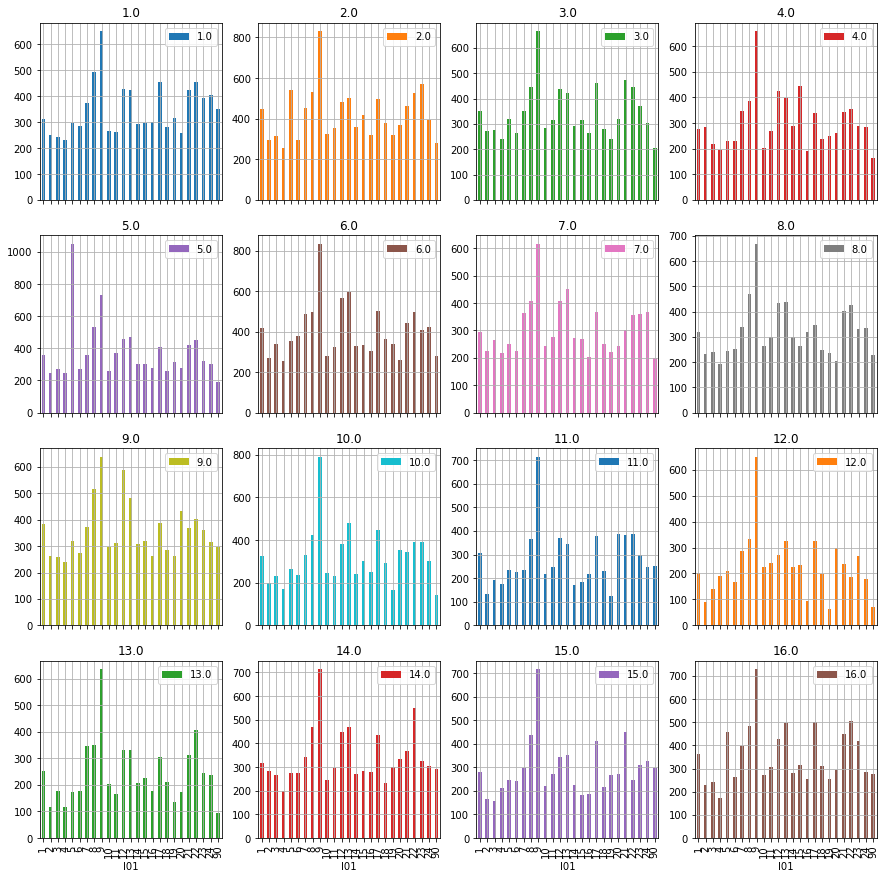

In [77]:
df_pivot_resultante.plot(by=df_resultante['I01'],figsize = (15,15) ,kind='bar', grid=True,subplots=True ,layout = (4,4))

In [78]:
df_pivot_result = df_pivot_resultante.sum(axis=1)

In [79]:
 df_pivot_resultante

Tipology,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
I01,,,,,,,,,,,,,,,,
1,312.808023,445.540671,351.770801,277.520880,359.579401,416.246175,294.306680,319.485752,384.898359,325.577679,308.533149,202.443528,251.717050,316.065090,281.834962,364.056539
2,252.058724,293.580953,273.123978,285.634147,247.012509,269.024111,224.885156,233.944193,262.154418,198.182002,134.134965,90.006445,118.535937,285.522518,165.242480,229.547584
3,241.886681,313.540691,274.137322,216.622109,273.622813,336.936689,266.232334,240.819053,259.527574,232.274370,191.559234,141.029809,176.044922,265.763226,157.463266,240.705208
4,230.949977,254.492794,241.961212,193.192417,249.433997,255.845422,217.628548,193.274515,241.319828,172.385264,174.288858,188.593090,118.497634,200.296761,210.249022,170.951475
5,295.465670,542.744900,319.594214,229.188311,1050.677848,351.518166,250.275323,244.316776,318.520217,262.756355,234.289256,207.967853,172.731873,276.306311,245.302864,455.779465
6,286.778114,296.538869,262.213559,230.761238,274.592201,379.806392,223.133429,253.587736,274.209002,235.834890,227.497608,165.328970,175.526523,273.707911,243.807260,264.208440
7,372.517992,451.800360,351.589712,345.140567,358.657218,488.013019,363.887000,340.731497,372.003734,328.941037,234.506545,285.635500,344.909722,342.395364,298.523578,398.170910
8,493.137082,530.365762,445.917299,384.416629,534.927127,498.524562,408.160692,470.176541,517.755678,421.622785,365.576505,334.720956,351.083664,469.169645,436.676702,483.255868
9,651.156061,831.383007,666.150568,658.148772,732.005123,834.289412,616.092953,668.468455,639.081908,791.546518,715.334920,651.307120,635.603507,713.824985,716.085944,728.986379


In [80]:
df_pivot_result

I01
1      5212.384740
2      3562.590119
3      3828.165302
4      3313.360812
5      5457.435401
6      4067.532141
7      5677.423755
8      7145.487497
9     11249.465632
10     4049.667992
11     4545.373956
12     6794.929773
13     6976.856318
14     4367.703996
15     4690.410908
16     3902.678053
17     6579.710114
18     4272.270783
19     3801.477736
20     4729.593223
21     6183.623257
22     6588.152796
23     5659.215390
24     5015.191948
90     3609.478116
dtype: float64

In [81]:
bins_groups = pd.cut(df_result_final['H12'], bins=[0,25,50,75,100,1000])
bins_groups

0           (0.0, 25.0]
1           (0.0, 25.0]
2           (0.0, 25.0]
3          (25.0, 50.0]
4           (0.0, 25.0]
               ...     
3815522             NaN
3815523     (0.0, 25.0]
3815524     (0.0, 25.0]
3815525     (0.0, 25.0]
3815526     (0.0, 25.0]
Name: H12, Length: 3718311, dtype: category
Categories (5, interval[int64, right]): [(0, 25] < (25, 50] < (50, 75] < (75, 100] < (100, 1000]]

# Tarifa por provincia

In [82]:
df_group_provincias = df_result_final.groupby(['I01','Nombre de la Provincia','Tipology',bins_groups])

In [83]:
df_count_provincias=df_group_provincias.size()

In [84]:
df_provincias = df_count_provincias.reset_index(name='Cuenta')
df_provincias

,I01,Nombre de la Provincia,Tipology,H12,Cuenta
0,1,AZUAY,1.0,"(0, 25]",15567
1,1,AZUAY,1.0,"(25, 50]",1311
2,1,AZUAY,1.0,"(50, 75]",225
3,1,AZUAY,1.0,"(75, 100]",40
4,1,AZUAY,1.0,"(100, 1000]",3
...,...,...,...,...,...
49995,90,ZONA NO DELIMITADA,16.0,"(0, 25]",82
49996,90,ZONA NO DELIMITADA,16.0,"(25, 50]",13
49997,90,ZONA NO DELIMITADA,16.0,"(50, 75]",4
49998,90,ZONA NO DELIMITADA,16.0,"(75, 100]",1


In [85]:
df_result_final

,I01,I02,I03,I04,I05,I06,I09,I10,URH,H00,...,Parientes,No Parientes,Codigo,Nh,Tipology,Tipo de Hogares,Nombre de la Provincia,PRECIO MEDIO 2010 ($/kWh),Consumo_kwh,Consumo_kwh*
0,1,1,50,1,1,1,1,1,1.0,1.0,...,0.0,0.0,123.0,3.0,2.0,Nuclear Biparental con hijos,AZUAY,0.0922,162.689805,125.417570
1,1,1,50,1,1,1,2,1,1.0,1.0,...,0.0,0.0,13.0,1.0,5.0,Nuclear Monoparental con jefatura femenina,AZUAY,0.0922,195.227766,150.501085
2,1,1,50,1,1,1,3,1,1.0,1.0,...,2.0,0.0,135.0,5.0,9.0,Extenso Monoparental con jefatura femenina,AZUAY,0.0922,206.073753,158.862256
3,1,1,50,1,1,1,4,1,1.0,1.0,...,1.0,1.0,12358.0,5.0,16.0,Nuclear Extenso Compuesto,AZUAY,0.0922,455.531453,351.169197
4,1,1,50,1,1,1,5,1,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,Unipersonal,AZUAY,0.0922,130.151844,100.334056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3815522,90,4,51,999,22,3,2,1,2.0,1.0,...,0.0,0.0,1.0,0.0,1.0,Unipersonal,ZONA NO DELIMITADA,0.0922,NaN,NaN
3815523,90,4,51,999,22,3,13,1,2.0,1.0,...,0.0,0.0,123.0,2.0,2.0,Nuclear Biparental con hijos,ZONA NO DELIMITADA,0.0922,43.383948,33.444685
3815524,90,4,51,999,22,4,1,1,2.0,1.0,...,0.0,0.0,123.0,3.0,2.0,Nuclear Biparental con hijos,ZONA NO DELIMITADA,0.0922,43.383948,33.444685
3815525,90,4,51,999,22,4,2,1,2.0,1.0,...,1.0,0.0,1237.0,4.0,6.0,Extenso Biparental con hijos,ZONA NO DELIMITADA,0.0922,54.229935,41.805857


In [86]:
df_result_final.columns

Index(['I01', 'I02', 'I03', 'I04', 'I05', 'I06', 'I09', 'I10', 'URH', 'H00',
       'H01', 'H01N', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09',
       'H10', 'H11', 'H12', 'H12NP', 'H13A', 'H13B', 'H14A', 'H14B', 'H15',
       'M1', 'M2A', 'M2B', 'TP1', 'TH1', 'TM1', 'id_man', 'id_viv', 'id_hog',
       'id_provin', 'id_can', 'id_parr', 'P01', 'P02', 'id', 'Numero de hijos',
       'Numero de hijas', 'Parientes', 'No Parientes', 'Codigo', 'Nh',
       'Tipology', 'Tipo de Hogares', 'Nombre de la Provincia',
       'PRECIO MEDIO 2010 ($/kWh)', 'Consumo_kwh', 'Consumo_kwh*'],
      dtype='object')

In [89]:
df_result_final = df_result_final.rename(columns={'Numero de hijos':'Numero_de_hijos',
                        'Numero de hijas':'Numero_de_hijas',
                        'No Parientes':'No_Parientes',
                        'No Parientes':'No_Parientes',
                        'id':'id_hog',
                        'Tipo de Hogares':'Tipo_de_Hogares',
                        'Nombre de la Provincia':'Nombre_de_la_Provincia',
                        'PRECIO MEDIO 2010 ($/kWh)':'PRECIO_MEDIO_2010_dolares_kWh',
                        'Consumo_kwh*':'Consumo_kwh_corregido'
                                                 })

In [90]:
#Guardar con libreria pyredstat
#pyreadstat.write_sav(df_result_final, "df_result_final.sav")

In [91]:
#df_result_final.to_csv('Base_modelo_estadistico.csv', index= False)

<function matplotlib.pyplot.show(close=None, block=None)>

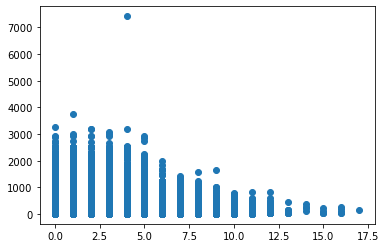

In [93]:
plt.scatter(df_result_final['Nh'], df_result_final['Consumo_kwh_corregido'])
plt.show

In [94]:
df_result_final.head()

,I01,I02,I03,I04,I05,I06,I09,I10,URH,H00,...,Parientes,No_Parientes,Codigo,Nh,Tipology,Tipo_de_Hogares,Nombre_de_la_Provincia,PRECIO_MEDIO_2010_dolares_kWh,Consumo_kwh,Consumo_kwh_corregido
0,1,1,50,1,1,1,1,1,1.0,1.0,...,0.0,0.0,123.0,3.0,2.0,Nuclear Biparental con hijos,AZUAY,0.0922,162.689805,125.417570
1,1,1,50,1,1,1,2,1,1.0,1.0,...,0.0,0.0,13.0,1.0,5.0,Nuclear Monoparental con jefatura femenina,AZUAY,0.0922,195.227766,150.501085
2,1,1,50,1,1,1,3,1,1.0,1.0,...,2.0,0.0,135.0,5.0,9.0,Extenso Monoparental con jefatura femenina,AZUAY,0.0922,206.073753,158.862256
3,1,1,50,1,1,1,4,1,1.0,1.0,...,1.0,1.0,12358.0,5.0,16.0,Nuclear Extenso Compuesto,AZUAY,0.0922,455.531453,351.169197
4,1,1,50,1,1,1,5,1,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,Unipersonal,AZUAY,0.0922,130.151844,100.334056


In [95]:
df_result_final['N miembros'] = df_result_final['Nh'] + df_result_final['Parientes'] + df_result_final['No_Parientes']

<function matplotlib.pyplot.show(close=None, block=None)>

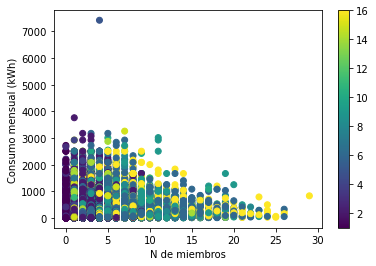

In [97]:
plt.scatter(df_result_final['N miembros'], df_result_final['Consumo_kwh_corregido'], c=df_result_final['Tipology'])
plt.xlabel('N de miembros')
plt.ylabel('Consumo mensual (kWh)')
plt.colorbar()
plt.show